In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [55]:
data = pd.DataFrame(pd.read_csv('./files/Social_Network_Ads.csv'))


In [56]:
data.sample(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
231,15694453,Male,39,42000,0
227,15685346,Male,56,133000,1
300,15736397,Female,58,38000,1
41,15591915,Female,33,51000,0


In [57]:
data.shape

(400, 5)

<Axes: xlabel='Age', ylabel='Purchased'>

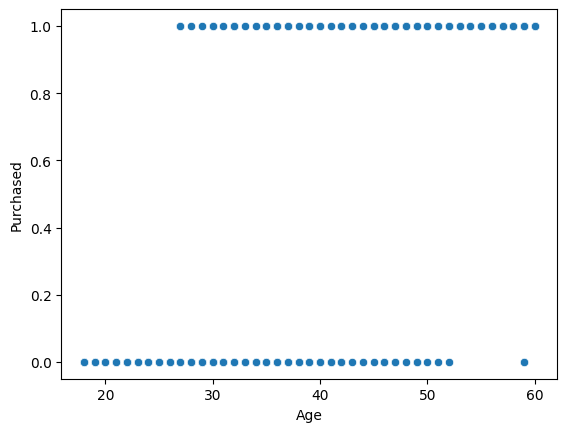

In [58]:
sns.scatterplot(data=data,x="Age",y="Purchased")

In [59]:
from sklearn.model_selection  import train_test_split

In [60]:
x=data[["Age"]]
y=data["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [63]:
x_test

,Age
265,42
347,54
103,33
328,36
309,38
...,...
378,41
269,40
306,51
394,39


In [64]:
y_test

265    1
347    1
103    1
328    1
309    0
      ..
378    1
269    0
306    0
394    0
334    1
Name: Purchased, Length: 80, dtype: int64

In [65]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report

In [73]:
y_pred = model.predict(x_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [74]:
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        51
           1       0.78      0.48      0.60        29

    accuracy                           0.76        80
   macro avg       0.77      0.70      0.71        80
weighted avg       0.77      0.76      0.75        80

Confusion Matrix:
 [[47  4]
 [15 14]]


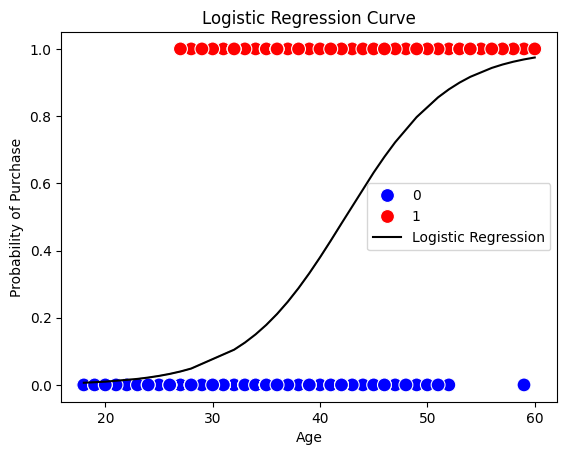

In [76]:
sns.scatterplot(x='Age', y='Purchased', data=data, hue='Purchased', palette={0: 'blue', 1: 'red'}, marker='o', s=100)

# Plot the logistic regression curve
sns.lineplot(x=x_test['Age'], y=model.predict_proba(x_test)[:, 1], color='black', label='Logistic Regression')

plt.title('Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.legend()
plt.show()